<a href="https://colab.research.google.com/github/Ksywwa/ML/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [1]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/sample_data/heart.csv')

In [4]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [6]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [8]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [9]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'SES'] = np.nan

In [10]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          5
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [11]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [15]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.SES = df_median.SES.fillna(df_median.SES.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [16]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.SES = df_mean.SES.fillna(df_median.SES.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [17]:
df['is_alive'] = np.where(df['DEATH'] > 0, 1, 0).astype(int)

In [18]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'is_alive'],
      dtype='object')

In [19]:
Y = df['is_alive'] # выбираем целевую переменную (категориальную)
X = df.drop('is_alive', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('DEATH', axis=1)

5. **Графический анализ**

In [20]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


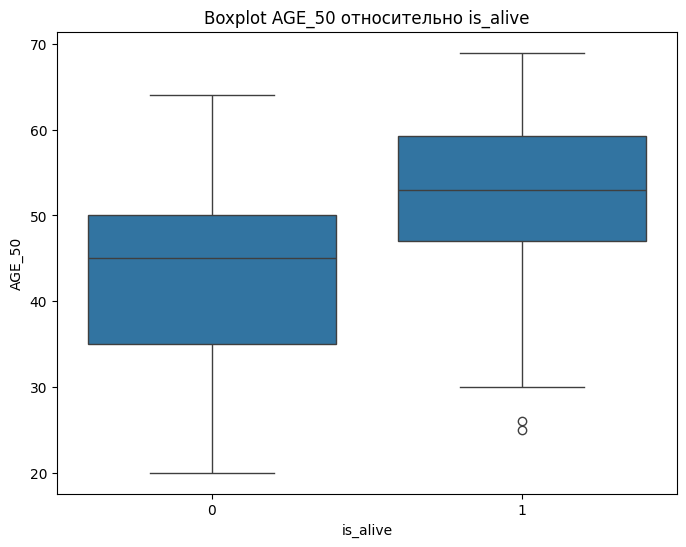

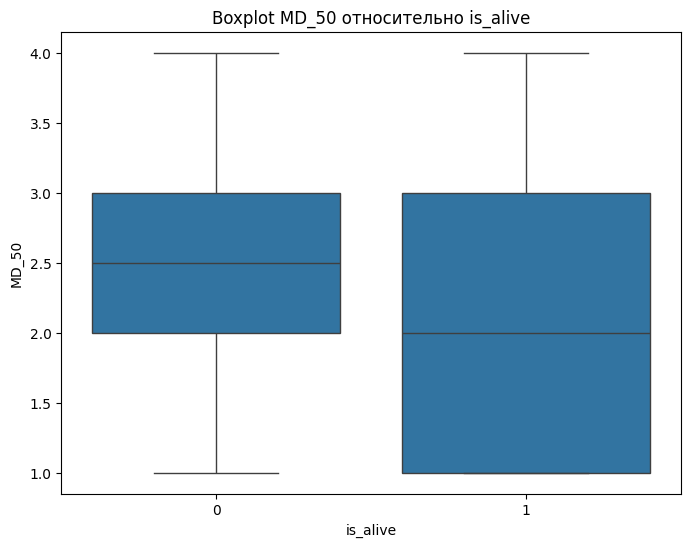

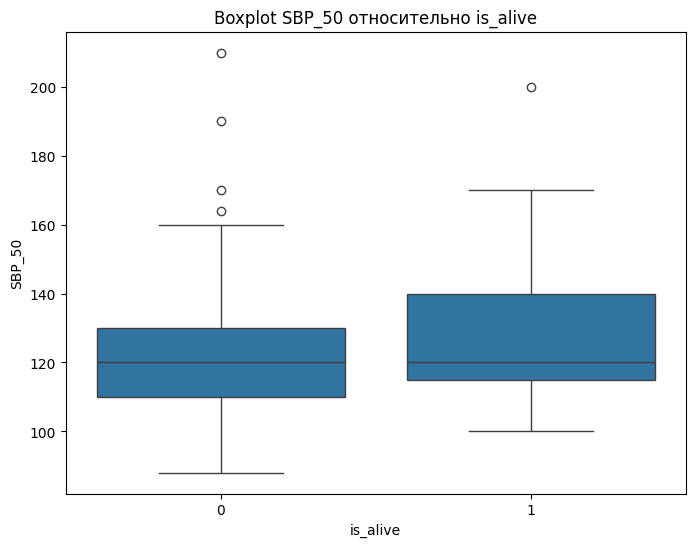

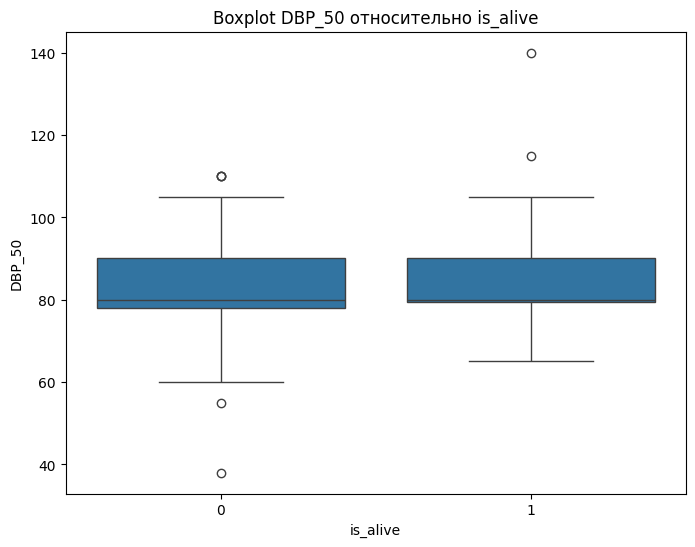

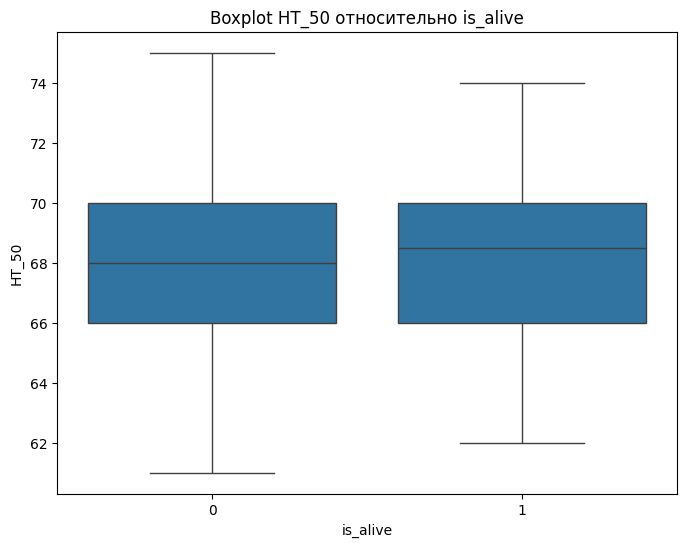

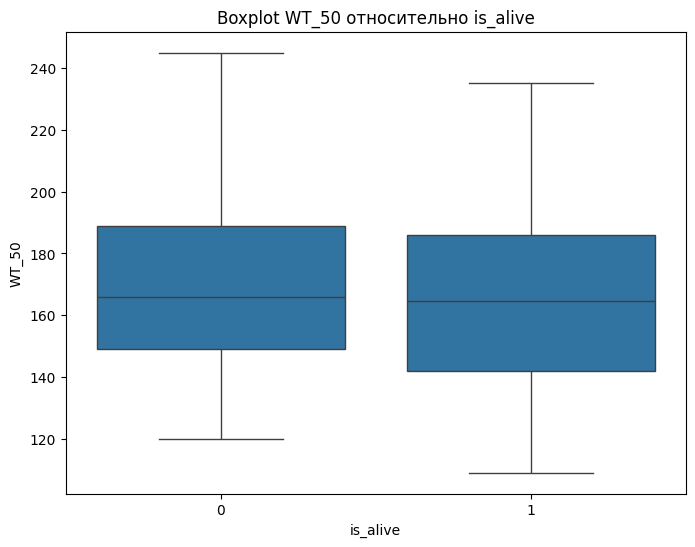

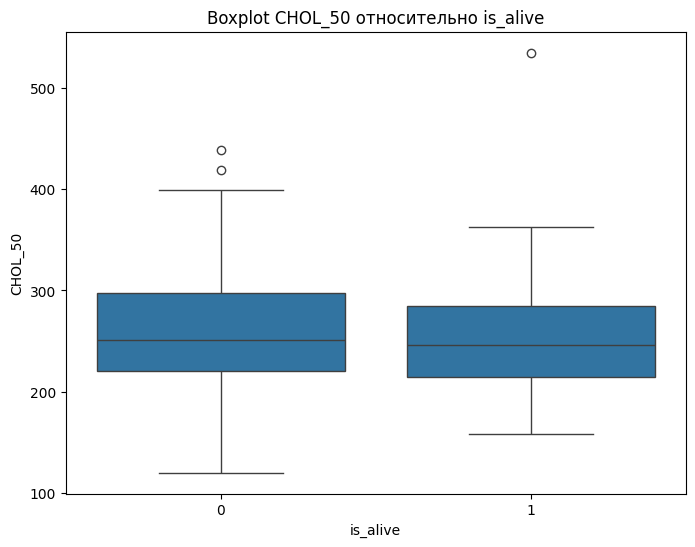

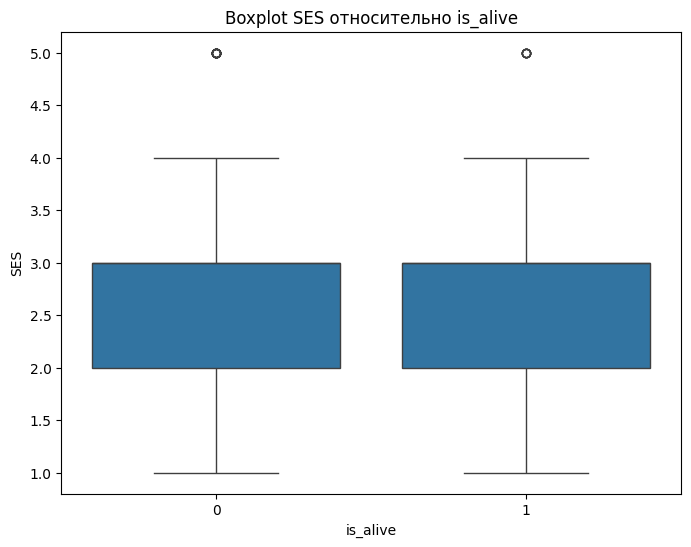

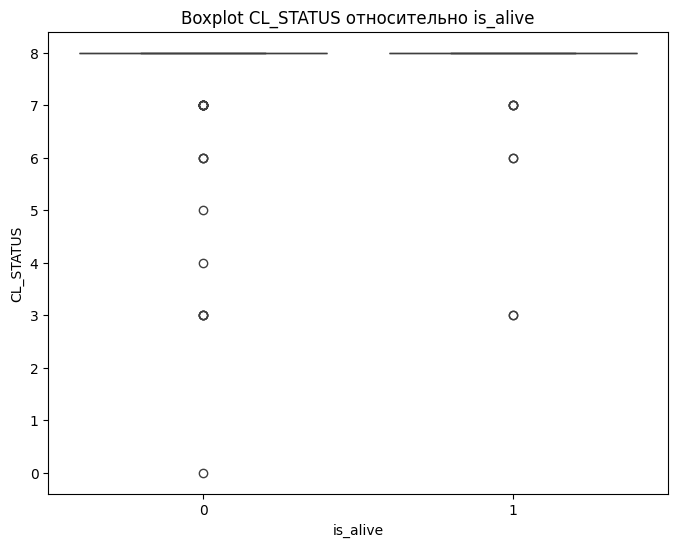

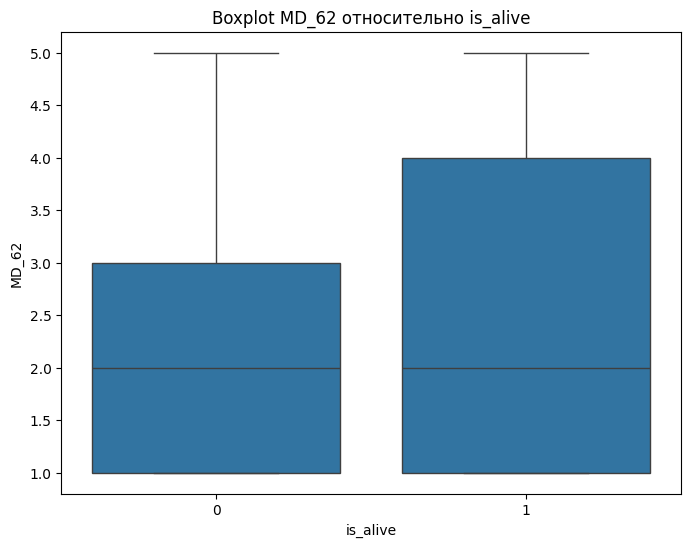

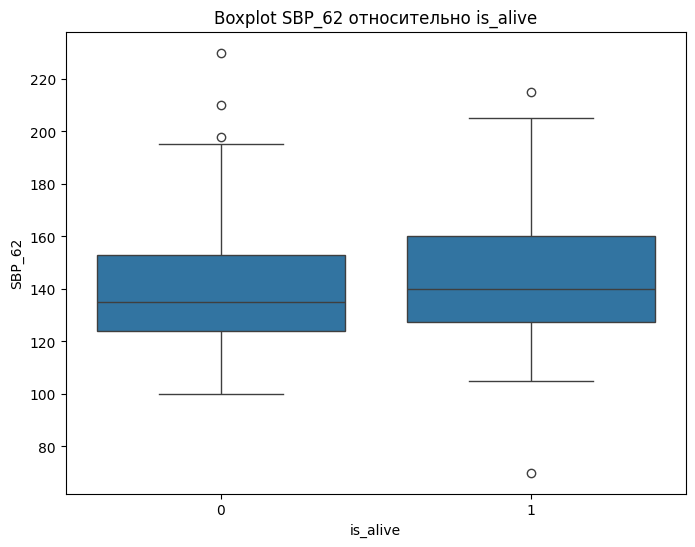

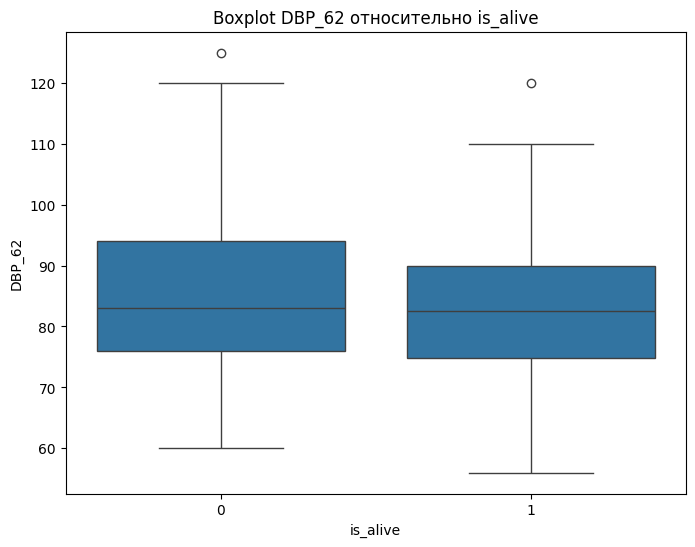

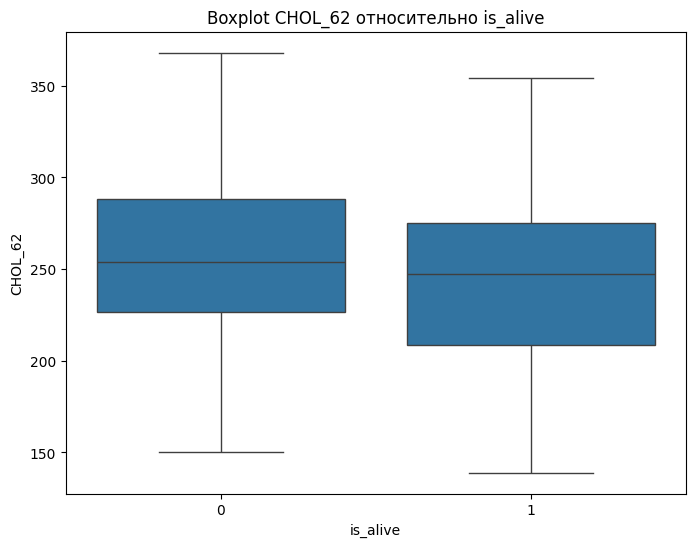

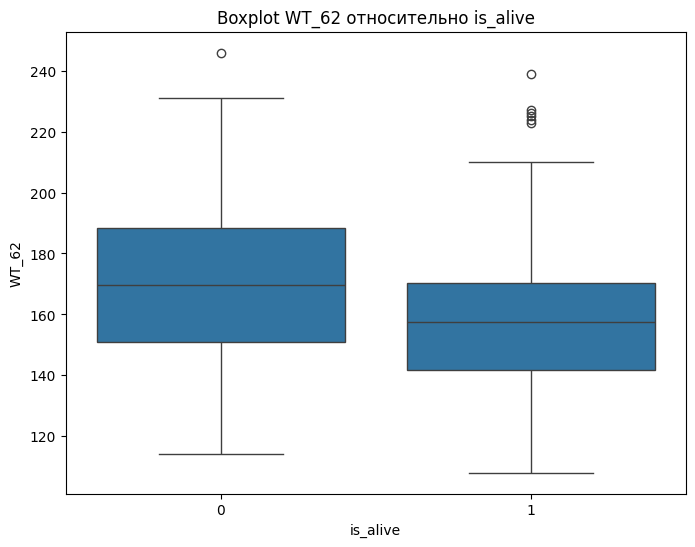

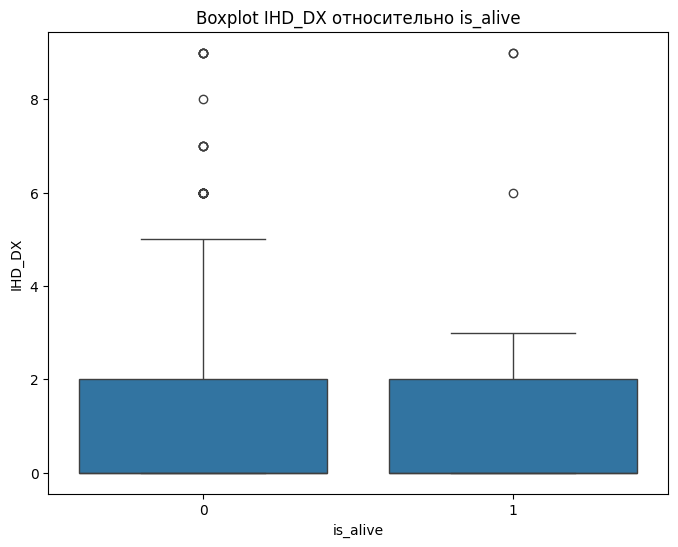

In [21]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_alive', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_alive')
    plt.show()

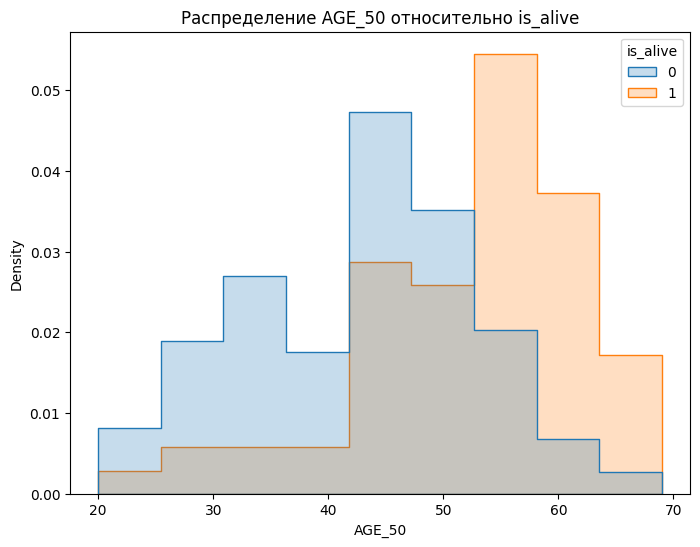

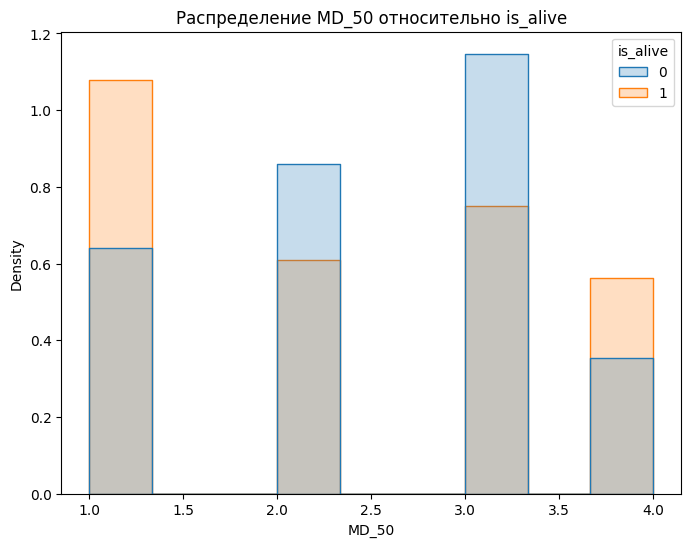

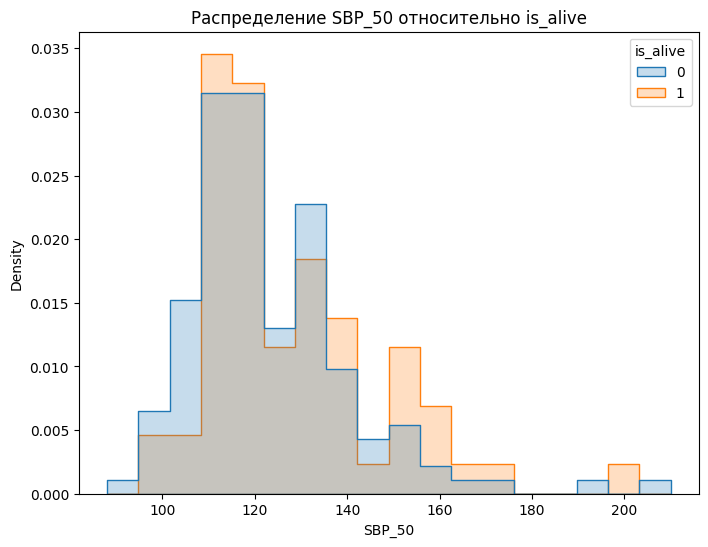

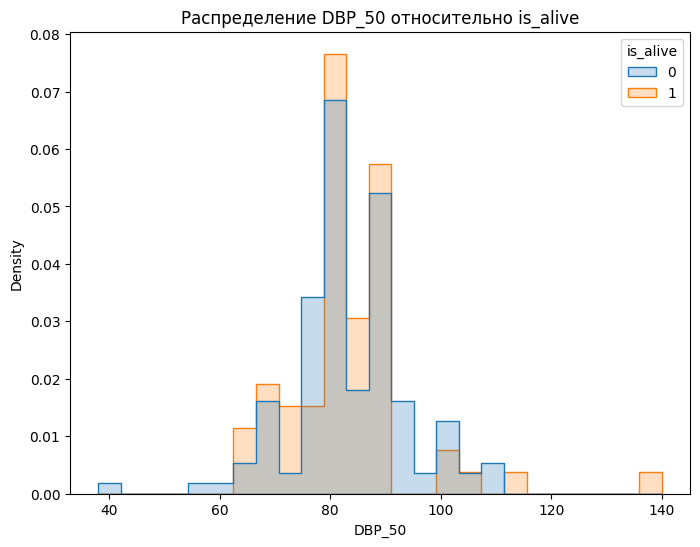

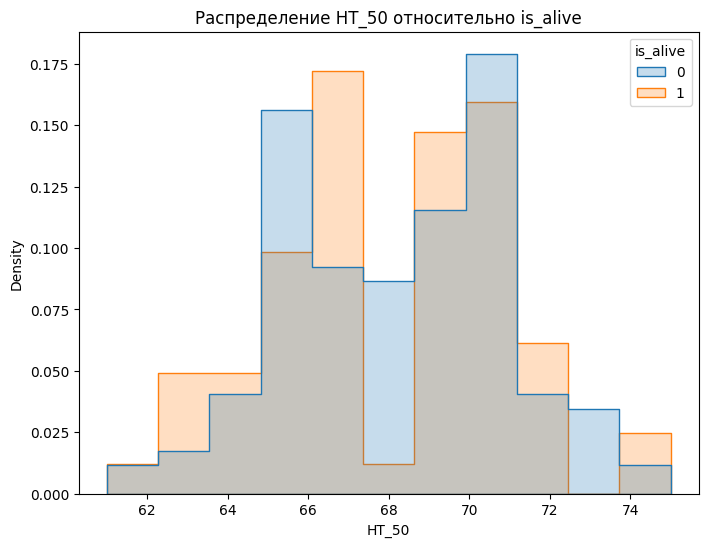

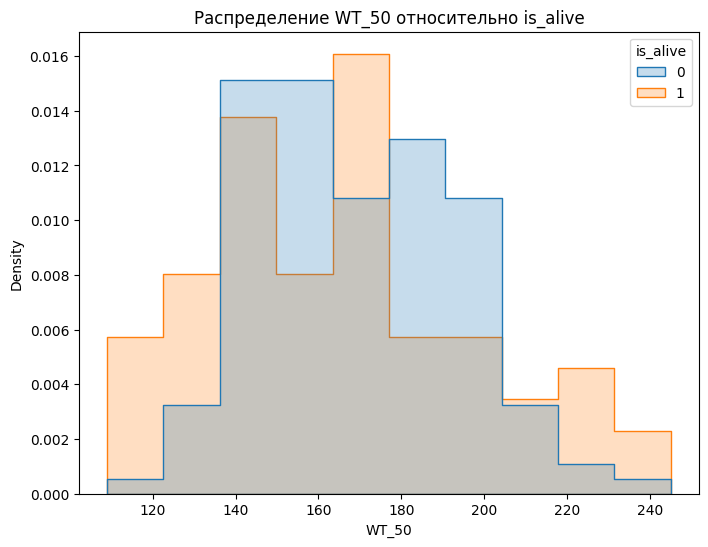

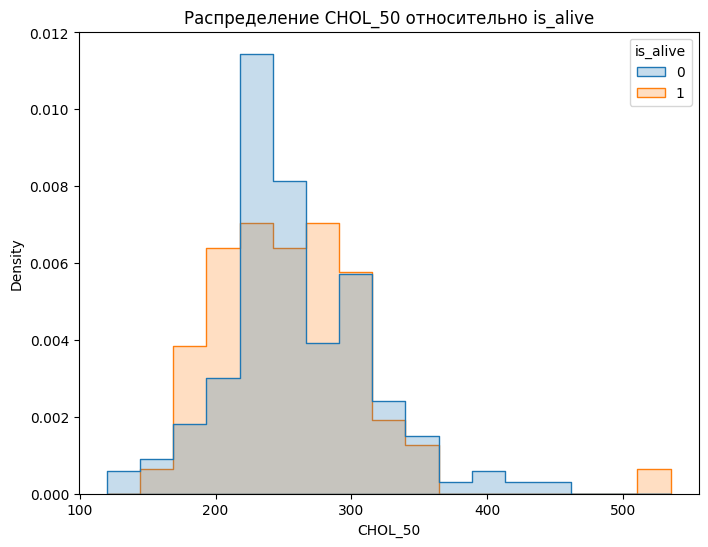

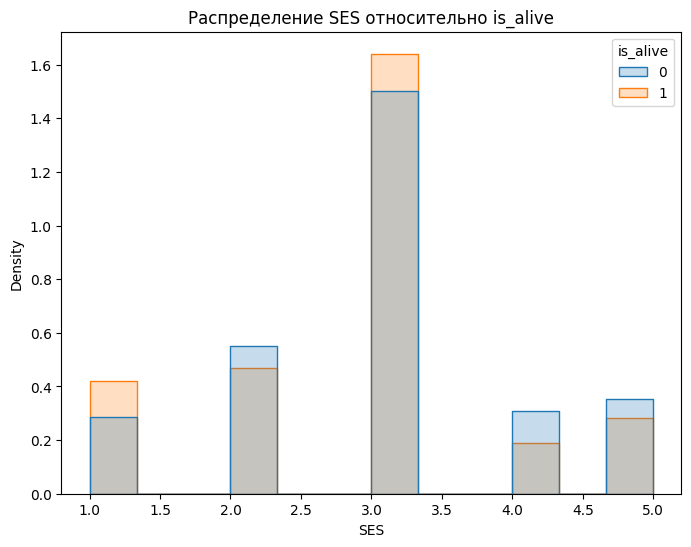

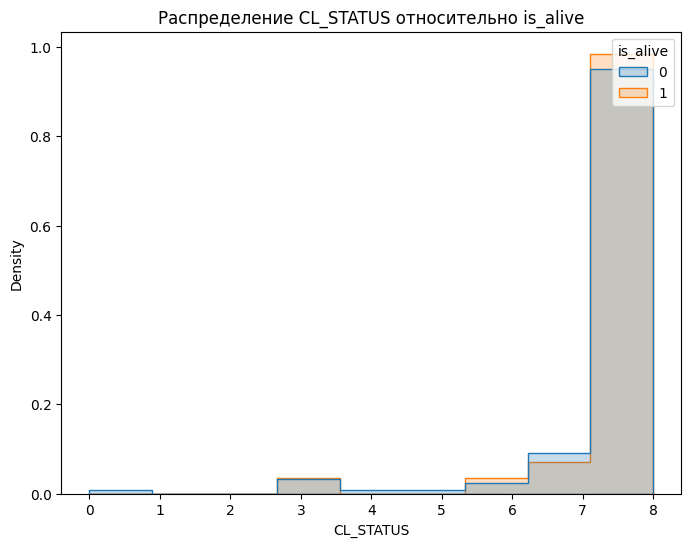

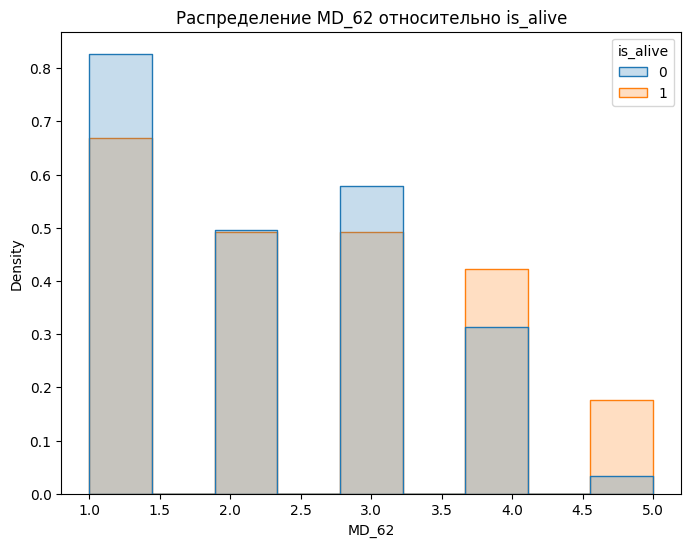

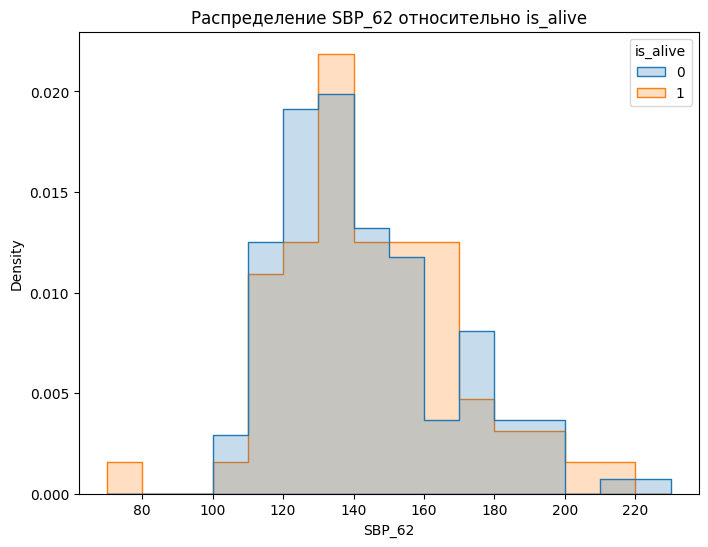

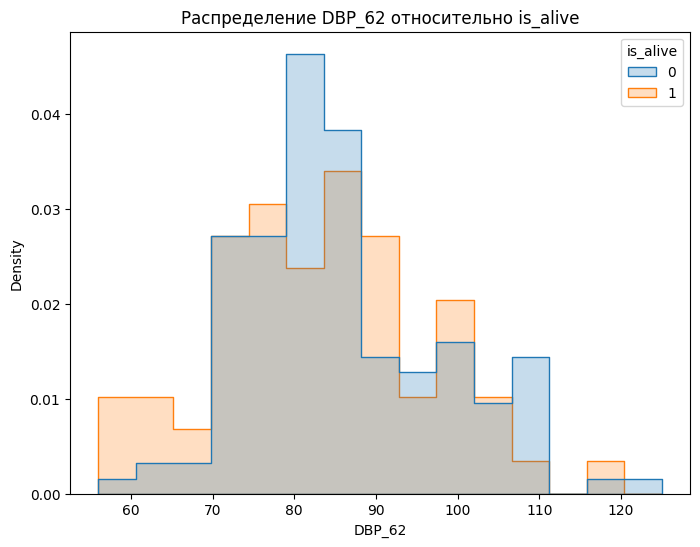

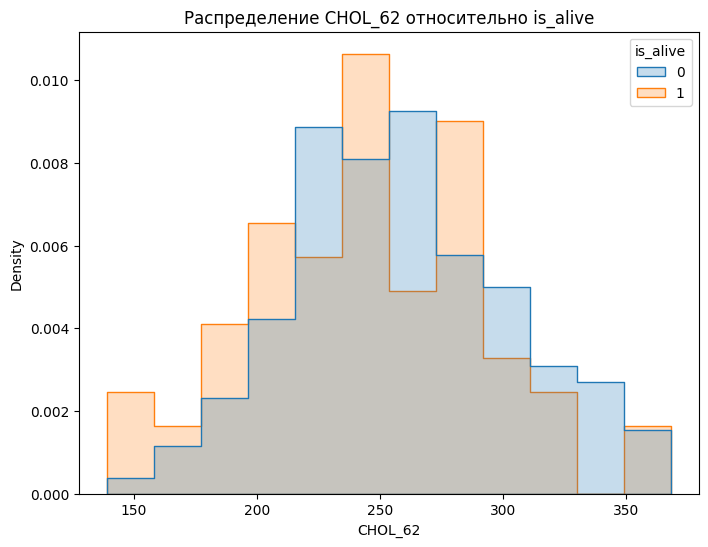

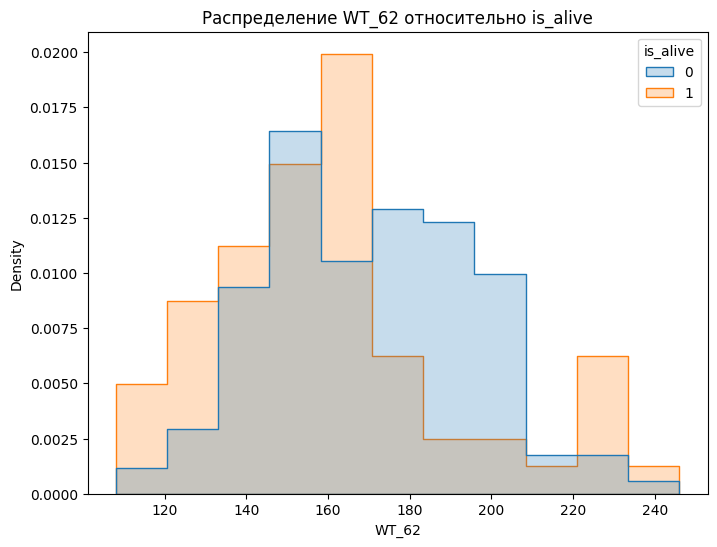

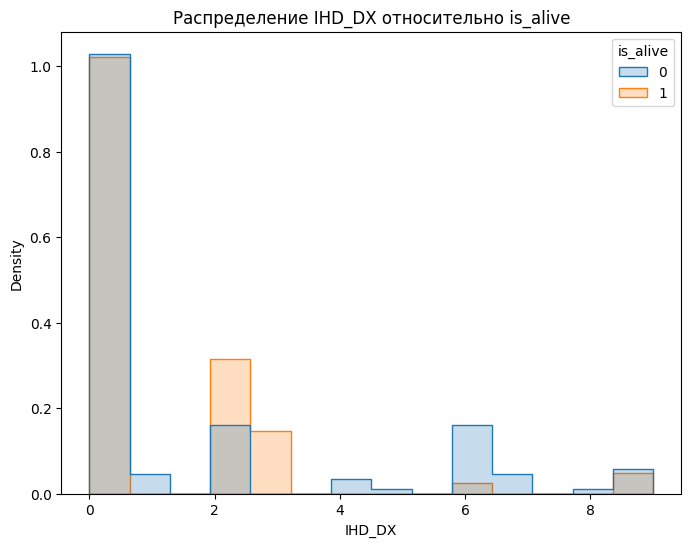

In [22]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_alive', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_alive')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [26]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_alive')[df.select_dtypes(include=[np.number]).columns].describe()
# Описательная статистика для категориальных переменных, разделенная по целевой переменной
categorial = df.select_dtypes(include=['object']).columns
if len(categorial) > 0:
  desc_stats_categorical = df.groupby('is_alive')[categorial].describe()
else:
  desc_stats_categorical = "Нет категориальных переменных."


### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_alive')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для AGE_50:

          count     mean       std   min   25%   50%    75%   max
is_alive                                                         
0         136.0  43.1250  9.967679  20.0  35.0  45.0  50.00  64.0
1          64.0  52.3125  9.904104  25.0  47.0  53.0  59.25  69.0


Описательная статистика для MD_50:

          count      mean       std  min  25%  50%  75%  max
is_alive                                                    
0         136.0  2.404412  0.953579  1.0  2.0  2.5  3.0  4.0
1          64.0  2.265625  1.144236  1.0  1.0  2.0  3.0  4.0


Описательная статистика для SBP_50:

          count        mean        std    min    25%    50%    75%    max
is_alive                                                                 
0         136.0  123.257353  17.557523   88.0  110.0  120.0  130.0  210.0
1          64.0  127.765625  19.023580  100.0  115.0  120.0  140.0  200.0


Описательная статистика для DBP_50:

          count       mean        std   min

In [27]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


'Нет категориальных переменных.'

#### 1. **AGE_50**:
   - Средний возраст пациентов, не умерших (DEATH=0), составил 43 года, в то время как средний возраст пациентов, умерших (DEATH=1), был 52 года. Это может говорить о том, что более старший возраст при первом обследовании связан с повышенным риском смерти. Разброс данных у обеих групп примерно одинаковый: стандартное отклонение составляет 9.97 и 9.90 соответственно, что может говорить о том, что возраст при первом обследовании не является определяющим фактором смертности.


#### 2. **MD_50**:
   - Средний код состояния у пациентов, не умерших, составил 2.4, а у пациентов, умерших - 2.3. Небольшая разница в среднем коде состояния не позволяет сделать однозначный вывод о его влиянии на смертность. Разброс данных у обеих групп также примерно одинаковый: стандартное отклонение составляет 0.95 и 1.14 соответственно, что может свидетельствовать о том, что состояние при первом обследовании не является ключевым фактором смертности.

#### 3. **SBP_50**:
   - Среднее систолическое давление у пациентов, не умерших, составило 123 мм рт.ст., а у пациентов, умерших - 127 мм рт.ст. Тенденция к более высокому давлению у группы, умершей, может свидетельствовать о том, что более высокое систолическое давление при первом обследовании может являться фактором риска смертности. Разброс данных у обеих групп относительно схож, но наблюдается тенденция к более высокому давлению у группы, умершей: стандартное отклонение составляет 17.56 и 19.02 соответственно.

#### 4. **DBP_50**:
   - Среднее диастолическое давление у пациентов, не умерших и умерших - 83 мм рт.ст., т.е. одинаковое. Разброс данных у обеих групп близок: стандартное отклонение составляет 10.66 и 11.77 соответственно, что говорит о незначительном влиянии диастолического давления при первом обследовании на риск смертности.

#### 5. **HT_50**:
   - Средний рост у пациентов составил 68 дюймов. Отсутствие различия в среднем росте не позволяет сделать вывод о его влиянии на смертность. Разброс данных у обеих групп примерно одинаковый: стандартное отклонение составляет 2.73 и 2.86 соответственно, что свидетельствует о том, что рост при первом обследовании не является определяющим фактором смертности.

#### 6. **WT_50**:
   - Средний вес у пациентов, не умерших, составил 169 фунтов, а у пациентов, умерших - 165 фунтов. Незначительная разница в среднем весе не позволяет сделать однозначный вывод о его влиянии на смертность. Разброс данных у обеих групп также схожий: стандартное отклонение составляет 24.03 и 31.54 соответственно, но наблюдается тенденция к более высокому весу у группы, не умершей.

#### 7. **CHOL_50**:
   - Средний уровень холестерина у пациентов, не умерших, составил 259 мг/дл, а у пациентов, умерших - 255 мг/дл. Незначительная разница в среднем уровне холестерина не позволяет сделать однозначный вывод о его влиянии на смертность. Разброс данных у обеих групп относительно одинаковый: стандартное отклонение составляет 54.41 и 58.19 соответственно, что может свидетельствовать о том, что уровень холестерина при первом обследовании не является ключевым фактором смертности.

#### 8. **SES**:
   - Средний социально-экономический статус участников с отсутствием смерти составил 2.96, а у участников с наступившей смертью - 2.81. Незначительная разница в среднем статусе не позволяет сделать однозначный вывод о его влиянии на смертность. Разброс данных у обеих групп относительно одинаковый: стандартное отклонение составляет 1.07 и 1.07 соответственно, что может говорить о том, что социально-экономический статус не является определяющим фактором смертности.

#### 9. **CL_STATUS**:
   - Средний клинический статус у пациентов, не умерших, составил 7.62, а у пациентов, умерших - 7.72. Незначительная разница в среднем статусе не позволяет сделать однозначный вывод о его влиянии на смертность. Разброс данных у обеих групп близок: стандартное отклонение составляет 1.19 и 0.95 соответственно, что говорит о незначительном влиянии клинического статуса на риск смертности.

#### 10. **MD62**:
   - Средний код состояния у пациентов, не умерших, составил 2.21, а у пациентов, умерших - 2.53. Тенденция к более высокому коду состояния у группы, умершей, может свидетельствовать о том, что состояние при последующем обследовании может являться фактором риска смертности. Разброс данных у обеих групп также примерно одинаковый: стандартное отклонение составляет 1.13 и 1.31 соответственно, но наблюдается тенденция к более высокому количеству заболеваний у группы, умершей.

#### 11. **SBP62**:
   - Среднее систолическое давление у пациентов, не умерших, составило 140 мм рт.ст., а у пациентов, умерших - 143 мм рт.ст. Тенденция к более высокому давлению у группы, умершей, может свидетельствовать о том, что более высокое систолическое давление при последующем обследовании может являться фактором риска смертности. Разброс данных у обеих групп относительно схож: стандартное отклонение составляет 24.28 и 25.57 соответственно, но наблюдается тенденция к более высокому давлению у группы, умершей.

#### 12. **DBP62**:
   -  Среднее диастолическое давление у пациентов, не умерших, составило 85 мм рт.ст., а у пациентов, умерших - 83 мм рт.ст. Незначительная разница в среднем давлении не позволяет сделать вывод о его влиянии на смертность. Разброс данных у обеих групп близок: стандартное отклонение составляет 12.63 и 13.14 соответственно, что говорит о незначительном влиянии диастолического давления при последующем обследовании на риск смертности.

#### 13. **CHOL62**:
   -  Данные о уровне холестерина при последующем обследовании не представлены.


#### 14. **WT_62**:
   -  Средний вес у пациентов, не умерших, составил 170 фунтов, а у пациентов, умерших - 160 фунтов. Тенденция к более высокому весу у группы, не умершей, может свидетельствовать о том, что более высокий вес при последующем обследовании может являться фактором риска смертности. Разброс данных у обеих групп относительно схож: стандартное отклонение составляет 25.57 и 30.37 соответственно, но наблюдается тенденция к более высокому весу у группы, не умершей.

#### 15. **IHD_DX**:
   -  Стандартное отклонение IHD_DX также выше для группы с высоким риском смерти (1.92) по сравнению с группой с низким риском (2.67).
Более низкое среднее значение IHD_DX в группе с высоким риском смерти может говорить о том, что наличие ишемической болезни сердца (IHD) может быть связано с более низким риском смерти. Однако, более высокое стандартное отклонение для этой группы указывает на большую вариативность этого показателя.


### Вывод:
На основании представленных данных можно предположить, что возраст при первом обследовании, систолическое артериальное давление (как при первом, так и при последующем обследовании), а также состояние здоровья при последующем обследовании могут быть связаны с риском смерти. Несмотря на то, что некоторые другие факторы, такие как вес, рост, уровень холестерина и социально-экономический статус, показывают небольшие различия между группами, их влияние на смертность требует дальнейшего анализа.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,is_alive
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356,0.397356
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779,-0.063779
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385,0.116385
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174,-0.006174
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632,-0.043632
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055,-0.064055
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717,-0.030717
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920,-0.065920
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225,0.042225
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237,0.124237


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **AGE_50 и SBP_50 (0.31)**:
   - Средняя положительная корреляция между возрастом и систолическим артериальным давлением. С возрастом систолическое давление имеет тенденцию к повышению, что является распространенным явлением, связанным с ухудшением эластичности сосудов.

2. **AGE_50 и DBP_50 (0.15)**:
   - Слабая положительная корреляция между возрастом и диастолическим артериальным давлением. Влияние возраста на диастолическое давление менее выражено, чем на систолическое.

3. **AGE_50 и SBP_62 (0.29)**:
   - Средняя положительная корреляция между возрастом и систолическим артериальным давлением в 62 года. Это указывает на то, что высокое давление в 50 лет предсказывает высокое давление в 62 года.


4. **SBP_50 и DBP_50 (0.75)**:
   - Очень сильная положительная корреляция между систолическим и диастолическим давлением в 50 лет. Это ожидаемо, так как эти два показателя тесно связаны и отражают общее состояние сердечно-сосудистой системы. Высокая корреляция может привести к мультиколлинеарности.

5. **SBP_50 и SBP_62 (0.49)**:
   - Сильная положительная корреляция между систолическим давлением в 50 и 62 года. Подтверждает тенденцию к сохранению высокого давления.

6. **HT_50 и WT_50 (0.44)**:
   - Средняя положительная корреляция между ростом и весом в 50 лет. Более высокий рост обычно связан с более высоким весом.

7. **AGE_50 и DEATH (0.40)**:
   - Средняя положительная корреляция между возрастом в 50 лет и смертью. Это ожидаемая связь, так как смертность увеличивается с возрастом.


### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62', 'IHD_DX']


In [30]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

NameError: name 'X_processed' is not defined

In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,False
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,False
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,False
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,False
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,True
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,True
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,True
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8187
Точность на тестовой выборке: 0.8254

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1044
           1       0.67      0.22      0.33       256

    accuracy                           0.83      1300
   macro avg       0.76      0.60      0.61      1300
weighted avg       0.80      0.83      0.79      1300



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                 Feature  Coefficient
10               alcohol     5.683547
1       volatile acidity    -4.316148
3         residual sugar     2.822608
9              sulphates     2.459910
5    free sulfur dioxide     2.160035
4              chlorides    -2.092775
6   total sulfur dioxide    -1.321306
0          fixed acidity     1.138116
8                     pH     0.896175
7                density    -0.784141
11            type_white     0.286346
2            citric acid     0.142521


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8088
Отклонение точности: 0.0135


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

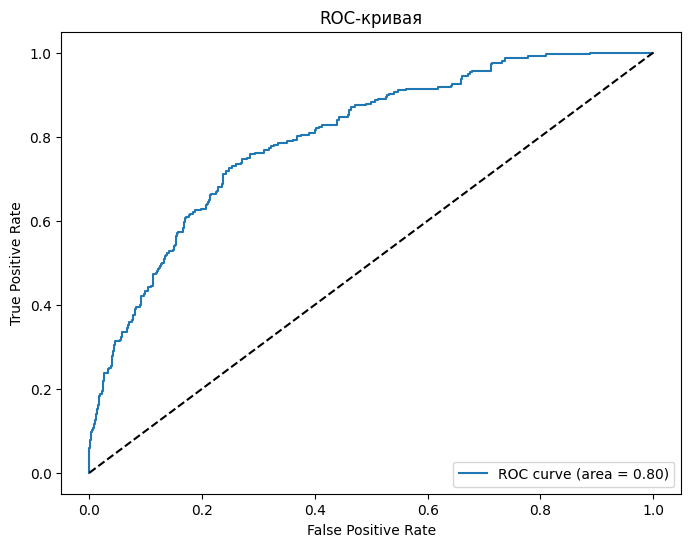

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---